<a href="https://colab.research.google.com/github/monci-mamachan628/homework1/blob/main/FFAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image
import torch.nn.functional as F

we are importing oru dataset from our own personal google drive folder.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
 cd /content/drive/MyDrive/Project_data/Vegetable Images

/content/drive/MyDrive/Project_data/Vegetable Images


In [ ]:
import os
path = "/content/drive/MyDrive/Project_data/Vegetable Images"
os.listdir(path)

['train', 'validation', 'test']

In [ ]:
ls

test/  train/  validation/


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("Use Cuda")
else:
    device = torch.device('cpu')
    print("Use CPU")

Use Cuda


In [ ]:
train_path = '/content/drive/MyDrive/Project_data/Vegetable Images/train'
test_path ='/content/drive/MyDrive/Project_data/Vegetable Images/test'
valid_path ="/content/drive/MyDrive/Project_data/Vegetable Images/validation"

In [ ]:
from torchvision import transforms

# Compose transformations
data_transform = transforms.Compose([
  transforms.Resize([64,64]),
transforms.ToTensor(),
transforms.Normalize(.5,.5)
])
# Load dataset with transforms
train_set = torchvision.datasets.ImageFolder(train_path,transform=data_transform)
test_set =torchvision.datasets.ImageFolder(test_path,transform=data_transform)
valid_set =torchvision.datasets.ImageFolder(valid_path,transform=data_transform) 


In [ ]:
#Data set len

num_train = len(train_set)
num_test = len(test_set)
num_valid = len(valid_set)
print("Number of. training samples:",num_train)
print("Number of. test samples:",num_test)
print("Number of. valid samples:",num_valid)


Number of. training samples: 15010
Number of. test samples: 3000
Number of. valid samples: 3000


In [ ]:
from torch.utils.data import Subset
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16,num_workers=2,drop_last=True,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16,num_workers =2,drop_last=False, shuffle =False)
valid_loader = torch.utils.data.DataLoader(dataset=valid_set, batch_size=16, shuffle=True)


In [ ]:
inputs, labels = next(iter(train_loader))

print(inputs.shape)   # the first value represents the value of the batch size, second channel size, 3rd and 4 th image size.

print(labels.shape)

torch.Size([16, 3, 64, 64])
torch.Size([16])


In [ ]:
import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from PIL import Image

**Dataloader** Combines a dataset and a sampler, and provides an iterable over the given dataset. The DataLoader supports both map-style and iterable-style datasets with single- or multi-process loading, customizing loading order and optional automatic batching (collation) and memory pinning.

**Creating a CNN model**

The minimal layers we need for defining a CNN are

In [ ]:
import torch.nn as nn


class SimpleCNN(nn.Module):

#outputsize = (w-f+2p)/s + 1

  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(  #Sequential defines a block

        # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
#shape(16,8,64,64)
        nn.ReLU(),

        nn.BatchNorm2d(8),
#after the batch normalization the shape will be same.
#shape(16,8,64,64)

        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2),



       



         # Layer 3

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(32),

        nn.MaxPool2d(kernel_size=2, stride=2),



         #layer 4



        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(64),

        nn.MaxPool2d(kernel_size=2, stride=2)



         
         )

  



# Forward

  def forward(self, x):

    x = self.conv_layer(x)

    return x

In [ ]:
# Create the model

model = SimpleCNN()

print(model)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


Now we are assigning an image to a variable in order to test the model and find the output size.

In [ ]:
test_x, _ = test_set[0]
test_x.size()

torch.Size([3, 64, 64])

In [ ]:
test_x =test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 64, 64])

In [ ]:
output = model(test_x)

output.shape

output.size()

torch.Size([1, 64, 2, 2])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)

print(out_features)

256


our output size is 256

In [ ]:
class CNN(nn.Module):

  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(

         # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),

        nn.ReLU(),

        nn.BatchNorm2d(8),



        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2),



       



        #  # Layer 3

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(32),

        nn.MaxPool2d(kernel_size=2, stride=2),



        #  #layer 4



        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(64),

        nn.MaxPool2d(kernel_size=2, stride=2)
        )

    # Create fully-connected layers

    self.fc_layers = nn.Sequential(

        # a first FC layer

        nn.Linear(256, 4096),

        nn.ReLU(),

        nn.Linear(4096, 1024),

        nn.ReLU(),

        # the final Classification Layer

        nn.Linear(1024, 15)

    )



  # Forward

  def forward(self, x):

    x = self.conv_layer(x) 



    x = x.view(x.size(0), -1) 

    output = self.fc_layers(x) 

    return output

In [ ]:
# Create the model

model = CNN()

output = model(test_x)

output.shape

torch.Size([1, 15])

In [ ]:
# Define an optimizier

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)  
#Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea is to tweak parameters iteratively in order to minimize the cost function
# Define a loss 

criterion = nn.CrossEntropyLoss()

Training the algorithm

In [ ]:
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device('cpu')):

    try:

        net = net.to(dev)

        print(net)

        # Initialize history

        history_loss = {"train": [], "val": [], "test": []}

        history_accuracy = {"train": [], "val": [], "test": []}
        results = [0,0,0]
        valiloss = None

        # Process each epoch

        for epoch in range(epochs):

            # Initialize epoch variables

            sum_loss = {"train": 0, "val": 0, "test": 0}

            sum_accuracy = {"train": 0, "val": 0, "test": 0}

            # Process each split

            for split in ["train", "val", "test"]:

                if split == "train":

                  net.train()

                else:
                   net.eval()

                # Process each batch

                for (input, labels) in tqdm(loaders[split],desc=split):

                    # Move to CUDA

                    input = input.to(dev)

                    labels = labels.to(dev)

                    # Reset gradients

                    optimizer.zero_grad()

                    # Compute output

                    pred = net(input)

                    loss = criterion(pred, labels)

                    # Update loss

                    sum_loss[split] += loss.item()

                    # Check parameter update

                    if split == "train":

                        # Compute gradients

                        loss.backward()

                        # Optimize

                        optimizer.step()

                    # Compute accuracy

                    _,pred_labels = pred.max(1)

                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)

                    # Update accuracy

                    sum_accuracy[split] += batch_accuracy

            # Compute epoch loss/accuracy

            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Update history

            for split in ["train", "val", "test"]:

                history_loss[split].append(epoch_loss[split])

                history_accuracy[split].append(epoch_accuracy[split])
                # Print info

            print(f"Epoch {epoch+1}:",

                  f"TrL={epoch_loss['train']:.4f},",

                  f"TrA={epoch_accuracy['train']:.4f},",

                  f"VL={epoch_loss['val']:.4f},",

                  f"VA={epoch_accuracy['val']:.4f},",

                  f"TeL={epoch_loss['test']:.4f},",

                  f"TeA={epoch_accuracy['test']:.4f},")
            if valiloss is None or epoch_loss['val'] < valiloss:
                  valiloss = epoch_loss['val']
                  results = [epoch_accuracy['train'], epoch_accuracy['val'], epoch_accuracy['test']]  

    except KeyboardInterrupt:

        print("Interrupted")

    finally:

        # Plot loss

        plt.title("Loss")

        for split in ["train", "val", "test"]:

            plt.plot(history_loss[split], label=split)

        plt.legend()

        plt.show()

        # Plot accuracy

        plt.title("Accuracy")

        for split in ["train", "val", "test"]:

            plt.plot(history_accuracy[split], label=split)

        plt.legend()

        plt.show()
        return results

In [ ]:
loaders = {"train": train_loader,   

           "val": valid_loader,

           "test": test_loader}

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Li

train:   0%|          | 0/938 [00:00<?, ?it/s]

val:   0%|          | 0/188 [00:00<?, ?it/s]

test:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch 1: TrL=1.2136, TrA=0.6115, VL=0.6588, VA=0.7826, TeL=0.6810, TeA=0.7872,


train:   0%|          | 0/938 [00:00<?, ?it/s]

val:   0%|          | 0/188 [00:00<?, ?it/s]

test:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch 2: TrL=0.5444, TrA=0.8264, VL=0.3530, VA=0.8873, TeL=0.3616, TeA=0.8893,


train:   0%|          | 0/938 [00:00<?, ?it/s]

val:   0%|          | 0/188 [00:00<?, ?it/s]

test:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch 3: TrL=0.3543, TrA=0.8875, VL=0.2815, VA=0.9076, TeL=0.2768, TeA=0.9119,


train:   0%|          | 0/938 [00:00<?, ?it/s]

val:   0%|          | 0/188 [00:00<?, ?it/s]

test:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch 4: TrL=0.2479, TrA=0.9227, VL=0.2201, VA=0.9282, TeL=0.2203, TeA=0.9342,


train:   0%|          | 0/938 [00:00<?, ?it/s]

val:   0%|          | 0/188 [00:00<?, ?it/s]

test:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch 5: TrL=0.1812, TrA=0.9446, VL=0.1789, VA=0.9458, TeL=0.1860, TeA=0.9448,


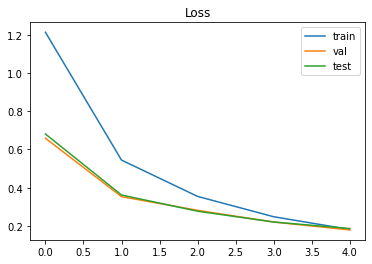

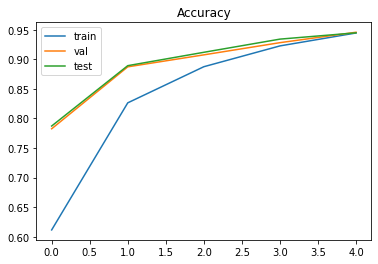

In [ ]:
result4 =train(model, loaders, optimizer, criterion, epochs=5, dev=device)

In [ ]:
print(result4)

[0, 0, 0]


# 3 Layers
Delete the last layer from the previous model

In [ ]:
import torch.nn as nn


class SimpleCNN3(nn.Module):


  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(  #Sequential defines a block

        # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
#shape(16,8,64,64)
        nn.ReLU(),

        nn.BatchNorm2d(8),
#after the batch normalization the shape will be same.
#shape(16,8,64,64)

        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2),



       



         # Layer 3

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(32),

        nn.MaxPool2d(kernel_size=2, stride=2)



         
         )

  



# Forward

  def forward(self, x):

    x = self.conv_layer(x)

    return x


In [ ]:
model3 = SimpleCNN3()

print(model3)

SimpleCNN3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [ ]:
test_x, _ = test_set[0]
test_x.size()

torch.Size([3, 64, 64])

In [ ]:
test_x =test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 64, 64])

In [ ]:
output = model3(test_x)

output.shape

output.size()

torch.Size([1, 32, 6, 6])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)

print(out_features)

1152


In [ ]:
class CNN3(nn.Module):

  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(

         # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),

        nn.ReLU(),

        nn.BatchNorm2d(8),



        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2),



       



        #  # Layer 3

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(32),

        nn.MaxPool2d(kernel_size=2, stride=2)
        )
      # Create fully-connected layers

    self.fc_layers = nn.Sequential(

        # a first FC layer


       nn.Linear(1152, 4096),

        nn.ReLU(),

        nn.Linear(4096, 1024),

        nn.ReLU(),
          # the final Classification Layer

        nn.Linear(1024, 15)

    )



  # Forward

  def forward(self, x):

    x = self.conv_layer(x) 



    x = x.view(x.size(0), -1) 

    output = self.fc_layers(x) 

    return output

In [ ]:
# Create the model

model33 = CNN3()

output = model33(test_x)

output.shape

torch.Size([1, 15])

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model33.parameters(), lr = 0.01)  


criterion = nn.CrossEntropyLoss()

In [ ]:
result3 =train(model33, loaders, optimizer, criterion, epochs=5, dev=device)
print(result3)

CNN3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=1152, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=15, bias=True)
  )
)


train:   0%|          | 0/938 [00:00<?, ?it/s]

In [ ]:
print(result3)

**2** **LAYER**

In [ ]:
import torch.nn as nn


class SimpleCNN2(nn.Module):


  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(  #Sequential defines a block

        # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
#shape(16,8,64,64)
        nn.ReLU(),

        nn.BatchNorm2d(8),
#after the batch normalization the shape will be same.
#shape(16,8,64,64)

        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Forward

  def forward(self, x):

    x = self.conv_layer(x)

    return x

In [ ]:
# Create the model

model2 = SimpleCNN2()

print(model2)

In [ ]:
test_x, _ = test_set[0]
test_x.size()

In [ ]:
test_x =test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 64, 64])

In [ ]:
output = model2(test_x)

output.shape

output.size()

torch.Size([1, 16, 15, 15])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)

print(out_features)

3600


In [ ]:
class CNN2(nn.Module):

  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(

         # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),

        nn.ReLU(),

        nn.BatchNorm2d(8),



        # # Layer 2

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),

        nn.ReLU(),

        nn.BatchNorm2d(16),

        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    # Create fully-connected layers

    self.fc_layers = nn.Sequential(

        # a first FC layer

        nn.Linear(3600, 4096),

        nn.ReLU(),

        nn.Linear(4096, 1024),

        nn.ReLU(),

        # the final Classification Layer
        nn.Linear(1024, 15)

    )



  # Forward

  def forward(self, x):

    x = self.conv_layer(x) 



    x = x.view(x.size(0), -1) 

    output = self.fc_layers(x) 

    return output
    

In [ ]:
# Create the model

model22 = CNN2()

output = model22(test_x)

output.shape

torch.Size([1, 15])

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model22.parameters(), lr = 0.01)  


criterion = nn.CrossEntropyLoss()

In [ ]:

result2 = train(model22, loaders, optimizer, criterion, epochs=5, dev=device)



CNN2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=3600, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=15, bias=True)
  )
)


train:   0%|          | 0/938 [00:00<?, ?it/s]

In [ ]:
print(result2)

**single layer**


In [ ]:
import torch.nn as nn
class SimpleCNN1(nn.Module):



  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(  #Sequential defines a block

        # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
#shape(16,8,64,64)
        nn.ReLU(),

        nn.BatchNorm2d(8),
#after the batch normalization the shape will be same.
#shape(16,8,64,64)
)
    

# Forward

  def forward(self, x):

    x = self.conv_layer(x)

    return x

In [ ]:
# Create the model

model1 = SimpleCNN1()

print(model1)

In [ ]:
test_x, _ = test_set[0]
test_x.size()

In [ ]:
test_x =test_x.unsqueeze(dim=0)
test_x.size()

In [ ]:
output = model1(test_x)

output.shape

output.size()

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)

print(out_features)

In [ ]:
class CNN1(nn.Module):

  #Constructor

  def __init__(self):

    # Call parent contructor

    super().__init__()

    self.conv_layer = nn.Sequential(

         # Layer 1

        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),

        nn.ReLU(),

        nn.BatchNorm2d(8)



     
        )

    # Create fully-connected layers

    self.fc_layers = nn.Sequential(

        # a first FC layer

        nn.Linear(8192, 4096),

        nn.ReLU(),

        nn.Linear(4096, 1024),

        nn.ReLU(),

        # the final Classification Layer

        nn.Linear(1024, 15)

    )



  # Forward

  def forward(self, x):

    x = self.conv_layer(x) 



    x = x.view(x.size(0), -1) 

    output = self.fc_layers(x) 

    return output

In [ ]:

model11 = CNN1()

output = model11(test_x)

output.shape

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model11.parameters(), lr = 0.01)  
#Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea is to tweak parameters iteratively in order to minimize the cost function
# Define a loss 

criterion = nn.CrossEntropyLoss()

In [ ]:
result1 =train(model11, loaders, optimizer, criterion, epochs=5, dev=device)

In [ ]:
print(result4)

In [ ]:
percentage1 = [str(round(num * 100, 2))+"%" for num in result1]
percentage2 = [str(round(num * 100, 2))+"%" for num in result2]
percentage3 = [str(round(num * 100, 2))+"%" for num in result3]
percentage4 = [str(round(num * 100, 2))+"%" for num in result4]


In [ ]:
import numpy as np


In [ ]:
#Predicting the Category for all Test Images

# Confusion_matrix



total_correct = 0

total_images = 0

confusion_matrix1 = np.zeros([15,15], int)

with torch.no_grad():

    for data in test_loader:

        images, labels = data

        images = images.to(device)

        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total_images += labels.size(0)

        total_correct += (predicted == labels).sum().item()

        for i, l in enumerate(labels):

            confusion_matrix1[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100

print('total images correct {0} on {1} total images with an accuracy of : {2:.2f}%'.format(total_correct,total_images, model_accuracy))

print ()


In [ ]:
from pandas.core.dtypes.common import classes
import pandas as pd

import seaborn as sn

df1  = pd.DataFrame(confusion_matrix1,train_set.classes,train_set.classes)

sn.set(font_scale=1) # for label size

sn.heatmap(df1, annot=True, annot_kws={"size": 4}, cmap ="YlGnBu") # font size



plt.show()